# Final Exam - Titanic Data Analysis
Titanic was a British passenger liner that sank in 1912 after colliding with an iceberg. The `titanic.csv` file contains data for 891 of the real Titanic passengers. Each row represents one person. The goal of this exam is to complete the analysis of **what sorts of people were likely to survive.**

As you go through this notebook, you will find a **???** in certain places. To complete this assignment, you must replace all the **???** with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.

Some things to keep in mind:

* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* Feel free to add code cells/markdown cells for your analysis as long as you solve all the questions.
* There are a total of 20 questions. Each one is worth 5 points.

**Please run all the cells to display all output before you submit your work, otherwise, 10 points will be deducted**

First, import the libraries below

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's load the data from the CSV file into a Pandas data frame

In [2]:
titanic_df = pd.read_csv("data/titanic.csv")

Show the top 5 rows of the `titanic_df`

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature notes
`pclass`: A proxy for socio-economic status (SES) <br>
1st = Upper  <br>
2nd = Middle  <br>
3rd = Lower   <br>

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp`: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister <br>
Spouse = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...<br>
Parent = mother, father  <br>
Child = daughter, son, stepdaughter, stepson  <br>
Some children travelled only with a nanny, therefore parch=0 for them.

`Cabin`: Cabin Number <br>
`Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Data Wrangling

#### Q1: How many observations (passenagers)  in the Titanic sample data

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Shows 891 rows

#### Q2: Which features are categorical? which features are numerical? 

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe your finding below

**Numerical Features:**
- Passenger ID (useless)
- Survived (0, 1 -> more or less categorical, but still a numeric feature)
- Pclass (1, 2, 3) -> more or less categorical, but still numerical in nature
- Age
- SibSp
- Parch
- Fare
**Categorical Features:**
- Name
- Sex
- Ticket
- Cabin
- Embarked

#### Q3: Which features contain missing values? and how many missing values for each one?

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describe your finding below

**Missing Values:**
- Age has **177** missing values
- Cabin has **687** missing values
- Embarked has **2** missing values

### Dealing with missing values

#### Q4: Dropping rows with missing values in the `Embarked` column. 
The `Embarked` column has just 2 missing values. So, we can drop rows that contain missing values in this column

In [7]:
titanic_df = titanic_df.dropna(subset=['Embarked'])

#### Q5: Dropping `Cabin` column
When a column has large missing values, there is no point in imputing the values with the least available true data we have. In our case, `Cabin` has 77% data missing, so you can take the choice of dropping this column.

In [8]:
titanic_df = titanic_df.drop(columns=['Cabin'])

#### Q6: Performing mean imputation on the  `Age` column
When a continuous variable column has missing values, you can calculate the mean of the non-null values and use it to fill the vacancies.

In [9]:
age_mean = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(age_mean)

### Mapping data
#### Q7: In order to intrepret the data easier the following fields need to be modified:
* Survived - changed to boolean (1 = True, 0 = False)
* Pclass - changed to Socio-Economic status (1st - Upper Class, 2nd - Middle Class, 3rd - Lower Class)
* Embarked - changed to name of embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton)

In [10]:
#Map 1, 0 to True, False
titanic_df['Survived'] = titanic_df['Survived'].astype(bool)

In [11]:
#Map Pclass to Strings
titanic_df['Pclass'] = titanic_df['Pclass'].map({1: "Upper Class", 2: "Middle Class", 3: "Lower Class"})

In [12]:
#Map Embark to Expanded Strings
titanic_df['Embarked'] = titanic_df['Embarked'].map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})

In [13]:
#Head to ensure accuracy
#titanic_df.head()

### Feature Engineering: create new features from existing features

#### Q8: Create new feature `FamilySize`
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets <br>
Note that: this new feature also includes the passenger himself/herself

In [14]:
titanic_df['FamilySize'] = titanic_df['Parch'].astype(int) + titanic_df['SibSp'].astype(int)

#### Q9: Create new feature `AgeGroup` and `FareGroup`

* AgeGroup: min-10 (<10), 10-20(Teen), 20-60(Adult), 60-max(Older)
* FareGroup: Evenly divide the range into 5 bins or use your own way to split the values into different groups

In [15]:
#Define Bins for Age_Group
ranges = [0, 10, 20, 60, np.inf]  # np.inf for infinity
labels = ['Minor', 'Teen', 'Adult', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], 
                                  bins=ranges, 
                                  labels=labels)
#Define FareGroup
titanic_df['FareGroup'] = pd.cut(titanic_df['Fare'], 5, labels = [1, 2, 3, 4, 5])

### Removing unwanted columns
#### Q10: Since the `PassengerId`, `Name`, `Ticket numbers`, `SibSp` and `Parch` are not required in this analysis,  you will remove them to improve the speed of processing the dataframe.

In [16]:
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'])

### Checking some statistical details
#### Q11: Checking the statistical summary for numerical features

In [17]:
titanic_df.describe()

,Age,Fare,FamilySize
count,889.000000,889.000000,889.000000
mean,29.642093,32.096681,0.906637
std,12.968346,49.697504,1.614703
min,0.420000,0.000000,0.000000
25%,22.000000,7.895800,0.000000
50%,29.642093,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,10.000000


These statistical metrics give you an overview of the central tendency, dispersion and shape of a dataset’s numerical features

## Explarotory Data Analysis
Prior to conducting any analysis, we need to find out which feature is our target, a feature that needs to be predicted. Since we are exploring **what sorts of people were likely to survive.** our target for this dataset is the `Survived` column, all the other columns are predictor features that are used to determine(predict) the Target Feature. <br>

In EDA, we need to 
* Explore the distribution of features
* Explore the relationships between the target feature and the predictor features

#### Q12:   How many survivors, how many victims?
Before trying to determine the characteristics of a passenger that would make them more likely to survive, the number of survivors in the sample should be compared to the number of victims. 
* Create a bar chart to show the number of survivors Vs. the number of victims
* Create a pie chart to show the percentage of survivors Vs. the number of vicims

In [18]:
survived = titanic_df[titanic_df['Survived']==1].value_counts()
dead = titanic_df[titanic_df['Survived']==0].value_counts()

In [19]:
#Mapping Survived back to numeric, to assist with plotting
titanic_df['Survived'] = titanic_df['Survived'].astype(int)

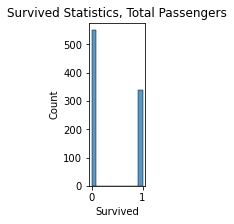

In [33]:
plt.rcParams["figure.figsize"] = [1, 3]
plotSurvivedTotal = sns.histplot(x = "Survived",
            data = titanic_df)
plt.title("Survived Statistics, Total Passengers")
plt.show()

### How  a passenger's age affects his/her survival rate?


#### Q13: What is the age distribution of Titanic passengers? using `Survived` as the hue

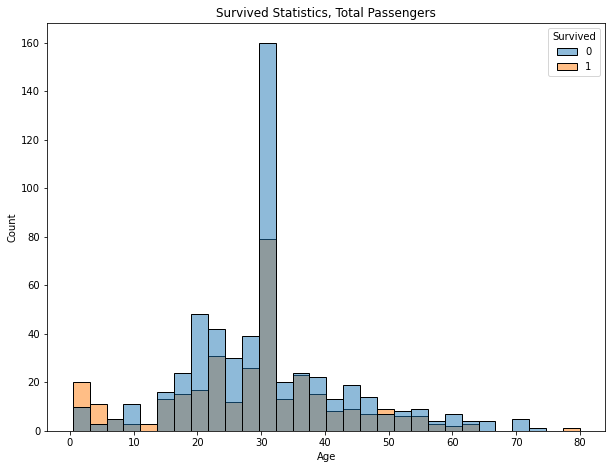

In [34]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotSurvived = sns.histplot(x = "Age",
            data = titanic_df, hue = "Survived")
plt.title("Survived Statistics, Total Passengers")
plt.show()

#### Q14: Which age group had a better chance of survival?

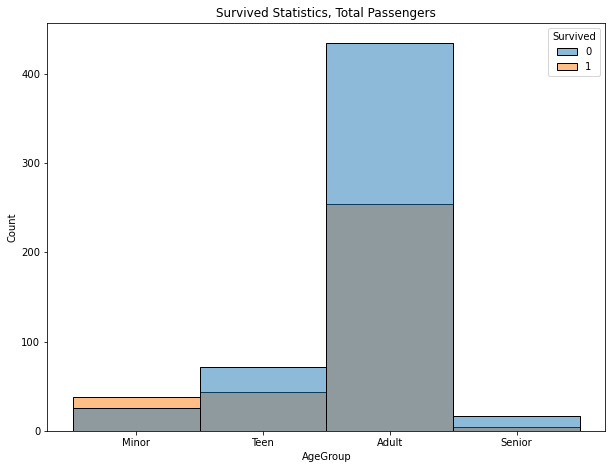

In [21]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotSurvived = sns.histplot(x = "AgeGroup",
            data = titanic_df, hue = "Survived")
plt.title("Survived Statistics, Total Passengers")
plt.show()

Describe your finding to this question below

**Teens and Adults had the highest odds of survival based on age-group alone.**

#### Q15: What is the age distribution of Titanic passengers? using `Survived` as the hue

Using the same graph as above... The supermajority of passengers were adults. Teens and minors followed, with the fewest in attendance being seniors (those over the age of 60)

### Did a higher proportion of those with family survive?

#### Q16: Try to answer the above question using data visualization.

Describe your finding below

**The graph shows similar survival  rates between people with families. However, it shows that there were more people without families that did not survive -> this could just be due to the fact that there were more people without families on board**

### Which class had a better chance of survival?

#### Q17: Try to answer the above question using data visualization.

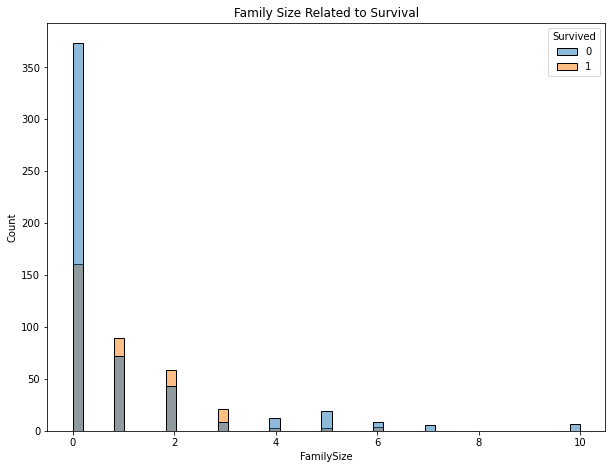

In [22]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotFamily = sns.histplot(x = "FamilySize",
            data = titanic_df, hue = "Survived")
plt.title("Family Size Related to Survival")
plt.show()

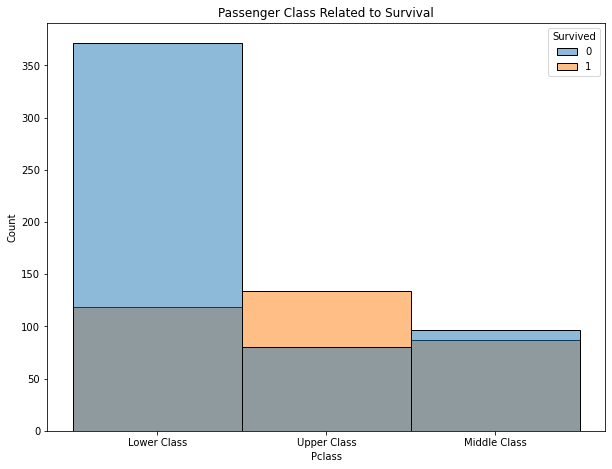

In [24]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotClass = sns.histplot(x = "Pclass",
            data = titanic_df, hue = "Survived")
plt.title("Passenger Class Related to Survival")
plt.show()

**Not particularly shocking. Upper class passengers had the highest percentage survival rate.**

### How the port of embarkation  affects the survivor rate

#### Q18: Try to answer the above question using data visualization.

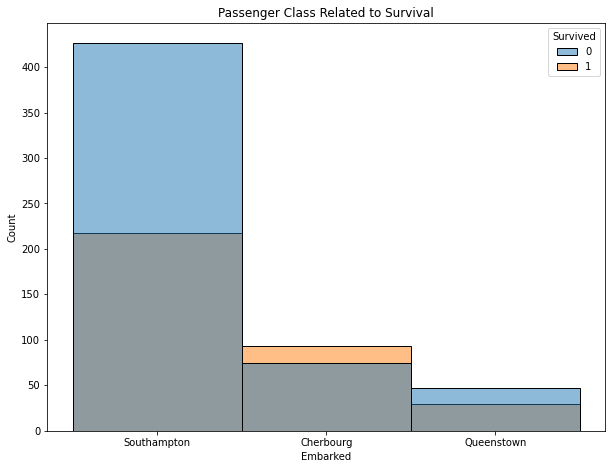

In [25]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotEmbarkation = sns.histplot(x = "Embarked",
            data = titanic_df, hue = "Survived")
plt.title("Passenger Class Related to Survival")
plt.show()

**The highest distribution of people embarked in Southampton. This is reflected in the fact that they also have the highest survival and non-survival  rate. Highest percentage of people survived goes to Cherbourg, however.**

### How the survival rate was affected by Faregroup

#### Q19: Try to answer the above question using data visualization.

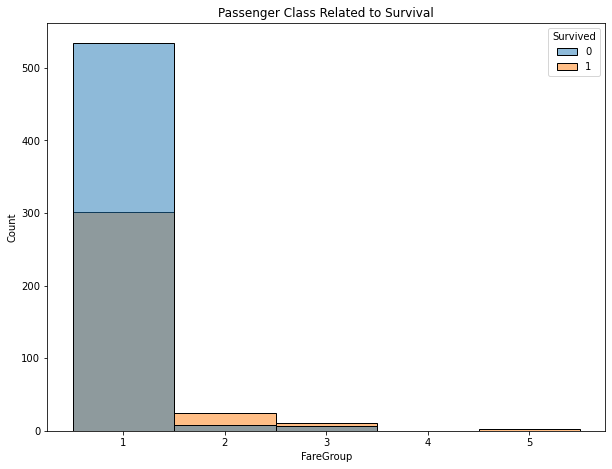

In [26]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotFareGroup = sns.histplot(x = "FareGroup",
            data = titanic_df, hue = "Survived")
plt.title("Passenger Class Related to Survival")
plt.show()

**The extreme majority of passengers were in Fare Class one, which makes sense. This is your lower class fare. We can see that from a percentage standpoint, higher paying passengers were much more likely to survive compared to their lower class counterparts**

#### Q20: Check fare distribution and explore the relationship between fare and class 

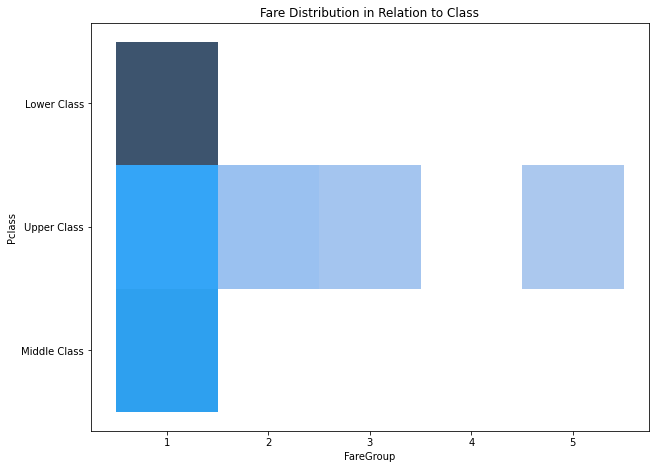

In [27]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotFaretoClass = sns.histplot(x = "FareGroup", y = "Pclass",
            data = titanic_df)
plt.title("Fare Distribution in Relation to Class")
plt.show()

**We can see that any tickets above FareGroup 1 were only owned by those within the upper class. FareGroup 1 however, encompasses the extreme majority of the tickets.**

**Before submitting your work, make sure to display full output, otherwise, 10 points will be deducted**